# Creating types

In [ ]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Fitness

In [ ]:
# minimizing fitness is built using negative weights
# maximizing fitness has positive weights

from deap import creator
from deap import base
creator.create("FitnessMin", base.Fitness, weights=(-1.0, 1.0))
creator.FitnessMin()
# deap.creator.FitnessMin(())   -->   Return a function

deap.creator.FitnessMin(())

"the weights attribute must be a tuple so that multi-objective and single objective fitnesses can be treated the same way"
 https://diigo.com/0qaz7m

## Individual

### List of Floats

"The first individual created will be a simple list containing floats"
 https://diigo.com/0qaz8c

In [ ]:
import random
from deap import creator
from deap import base
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

IND_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
# toolbox.attr_float()    -> how to check your value
# 0.6028992057886329 (it can be randomize)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)
toolbox.individual()

[0.10890805015742333,
 0.8869245933123515,
 0.8760217972748464,
 0.6898649210976232,
 0.6862175689970367,
 0.2481726497805654,
 0.26657623451651047,
 0.42791715416251874,
 0.14926392195085325,
 0.5823281112977742]

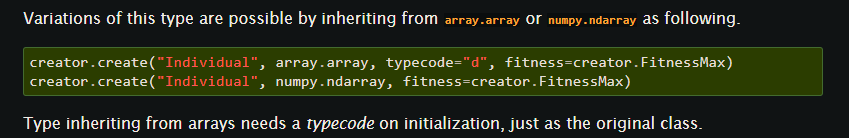

### Permutation

"An individual for the permutation representation is almost similar to the general list individual. In fact they both inherit from the basic list type"
 https://diigo.com/0qazc1

In [ ]:
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

IND_SIZE = 10

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
# toolbox.indices()
# [5, 8, 7, 3, 9, 6, 4, 0, 1, 2] -> random array from IND_SIZE
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
# toolbox.individual()
# [0, 3, 2, 4, 6, 1, 9, 8, 7, 5] -> It's a list that we get from toolbox.individual()

[5, 8, 7, 3, 9, 6, 4, 0, 1, 2]

### Arithmetic

"PrimitiveSet must be defined containing all possible mathematical operators that our individual can use."
 https://diigo.com/0qb1iv

 the individual is initialized using the initIterate() function to give the complete generated iterable to the individual class.

In [ ]:
import operator

from deap import base
from deap import creator
from deap import gp
from deap import tools

pset = gp.PrimitiveSet("Main", arity=1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
# pset
# <deap.gp.PrimitiveSet at 0x7fecdba784d0> -> memory allocation

creator.create("FitnessMin", base.Fitness, weights=(-1,0,))
# creator.FitnessMin()
# deap.creator.FitnessMin(()) -> It's a class that we made

creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin, pset=pset)
# creator.Individual() -> error

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_ = 2)
# toolbox.expr()    -> run this if you want to know about memory allocation and class.
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.individual()

### Expression

### Evolution Strategy

In [ ]:
import numpy as np
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0),)
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", np.ndarray)

def initES(icls, scls, size, imin, imax, smin, smax):
  ind = icls(random.uniform(imin, imax) for _ in range(size))
  ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
  return ind

IND_SIZE = 10
MIN_VALUE, MAX_VALUE = -5., 5.
MIN_START, MAX_START = -1., 1.

toolbox = base.Toolbox()
toolbox.register("individual", initES, creator.Individual)

In [ ]:
# for _ in range(5):
  # print("I \n")

### Particle

In [ ]:
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=None, smin=None, smax=None, best=None)

def initParticle(pcls, size, pmin, pmax, smin, smax):
  part = pcls(random.uniform(pmin, pmax) for _ in range(size))
  part.speed = [random.uniform(smin, smax) for _ in range(size)]
  part.smin = smin
  part.smax = smax
  return part

toolbox = base.Toolbox()
toolbox.register("particle", initParticle, creator.Particle, size=2, pmin=-6, pmax=6, smin=-3, smax=3)
toolbox.particle()

[-0.0032642176616075602, -4.149337335134595]

### A Fungky One

In [ ]:
import random
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

INT_MIN, INT_MAX = 5, 10
FLT_MIN, FLT_MAX = -0.2, 0.8
N_CYCLES = 4

toolbox.register("attr_int", random.randint, INT_MIN, INT_MAX)
toolbox.register("attr_flt", random.uniform, FLT_MIN, FLT_MAX)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int, toolbox.attr_flt), n=N_CYCLES)

In [ ]:
toolbox.individual()

[7,
 -0.14357257049563749,
 8,
 -0.0016218300503318406,
 5,
 0.03573055243957929,
 6,
 0.30768611881424063]

## Population

Populations are much like individuals. Instead of being initialized with attributes, they are filled with individuals, strategies or particles.

### Bag

A bag population is the most commonly used type. It has no particular ordering although it is generally implemented using a list. Since the bag has no particular attribute, it does not need any special class. The population is initialized using the toolbox and the initRepeat() function directly.

In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
toolbox.population(n=100) # take integer as parameter

### Grid

A grid population is a special case of structured population where neighbouring individuals have a direct effect on each other. The individuals are distributed in the grid where each cell contains a single individual. However, its implementation only differs from the list of the bag population, in that it is composed of lists of individuals.

In [ ]:
N_COL = 5
N_ROW = 5

toolbox.register("row", tools.initRepeat, list, toolbox.individual, n=N_COL)
toolbox.register("population", tools.initRepeat, list, toolbox.row, n=N_ROW)

In [ ]:
toolbox.row()

In [ ]:
toolbox.population()

### Swarm

A swarm is used in particle swarm optimization. It is different in the sense that it contains a communication network. The simplest network is the completely connected one, where each particle knows the best position that has ever been visited by any particle. This is generally implemented by copying that global best position to a gbest attribute and the global best fitness to a gbestfit attribute

In [ ]:
creator.create("Swarm", list, gbest=None, gbestfit=creator.FitnessMax)
toolbox.register("Swarm", tools.initRepeat, creator.Swarm, toolbox.particle)

In [ ]:
toolbox.Swarm(n=50)

### Demes

A deme is a sub-population that is contained in a population. It is similar to an island in the island model. Demes, being only sub-populations, are in fact not different from populations, aside from their names. Here, we create a population containing 3 demes, each having a different number of individuals using the n argument of the initRepeat() function.

In [ ]:
toolbox.register("deme", tools.initRepeat, list, toolbox.individual)

DEME_SIZES = 10, 50, 100
population = [toolbox.deme(n=i) for i in DEME_SIZES]

In [ ]:
print(population)

[[[8, 0.07410112252095374, 6, 0.27886440415674535, 6, 0.26673962161745707, 6, 0.2136873830948079], [8, 0.364752769291198, 8, -0.11951079780343316, 6, -0.12650743953697868, 10, 0.09970601050587452], [5, 0.7419678302523909, 5, 0.14629649344037204, 10, 0.04526604801523043, 5, 0.331074009318238], [8, 0.37682980993919196, 8, 0.6652606621993318, 7, -0.07567825725103167, 9, 0.13665712108551303], [9, 0.3622993403303231, 7, 0.7027477759158014, 6, 0.5429314882266392, 10, 0.12579051273423975], [10, 0.6884079026953804, 7, 0.6750171928985171, 7, 0.20842645033986235, 10, 0.4700617051705372], [9, 0.757390003494508, 9, 0.05069487663534783, 7, 0.5336820168383678, 9, 0.2589955314808052], [9, 0.06248914675154632, 5, 0.007379464340765363, 6, 0.6130004954263524, 10, 0.37762027705746143], [6, -0.022052368318056403, 7, 0.5669449788371232, 5, -0.1599668240296333, 5, -0.016497092201579966], [5, 0.1163478729714274, 8, 0.0025333654533445382, 9, 0.11499112432362762, 8, 0.7578199045740153]], [[8, -0.15487130726794

### Seeding a population

Sometimes, a first guess population can be used to initialize an evolutionary algorithm. The key idea to initialize a population with non-random individuals is to have an individual initializer that takes a content as argument.

In [ ]:
import json

from deap import base
from deap import creator

creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

def initIndividual(icls, content):
  return icls(content)

def initPopulation(pcls, ind_init, filename):
  with open(filename, "r") as pop_file:
    contents = json.load(pop_file)
  return pcls(ind_init(c) for c in contents)

toolbox = base.Toolbox()

toolbox.register("individual_guess", initIndividual, creator.Individual)
toolbox.register("population_guess", initPopulation, list, toolbox.individual_guess, "my_guess.json")

population = toolbox.population_guess()

FileNotFoundError: ignored